 <a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/Talude_infinito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Exemplo: Talude infinito



 Neste exemplo, vamos utilizar as equações de taludes infinitos (saturado ou seco) para o cálculo do fator de segurança.



 A seguir, apresenta-se uma imagem para melhor interpretação e a definição das variáveis:



 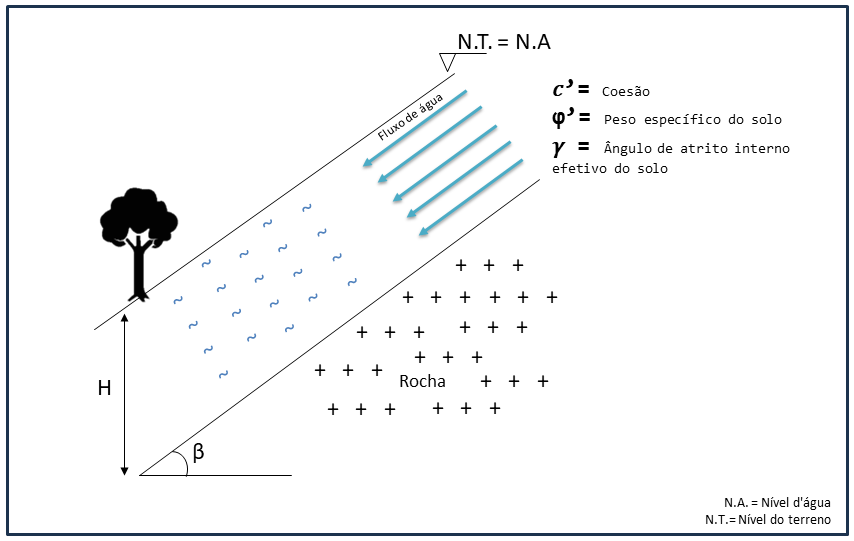

 ### Parâmetros



 Para o cálculo do fator de segurança (FS) da superfície analisada são necessários os seguintes parâmetros:



 - **𝑐**: Coesão efetiva do solo, c' (kN/m²)

 - **phi**: Ângulo de atrito interno efetivo do solo, ϕ' (° graus)

 - **gamma_n**: Peso específico do solo, 𝛾n (kN/m³)

 - **gamma_w**: peso específico da água, γw (kN/m³)

 - **H**: Espessura da coluna de solo (m)

 - **beta**: Ângulo de inclinação do talude, β (° graus)

 ## Pré-requisitos:

 Vamos utilizar os pacotes:



 - `numpy`: Biblioteca essencial para computação científica com suporte a arrays multidimensionais e funções matemáticas.

 - `ipywidgets`: Facilita a criação de interfaces interativas em notebooks Jupyter.

 - `matplotlib`: Biblioteca para criação de gráficos e visualizações 2D em Python.

 - `ipython.display`: Função para exibir objetos multimídia em notebooks Jupyter.

 - `mpl_toolkits.mplot3d`: Extensão de Matplotlib para visualizações e gráficos 3D.

 - `matplotlib.tri`: Suporte à triangulação e interpolação de dados para gráficos 2D.

 - `matplotlib.colors`: Manipulação e criação de escalas de cores personalizadas em gráficos.

 - `plotly`: Ferramenta para criação de gráficos interativos e personalizáveis.



 ## Exemplo: Taludes Infinitos



  Cálculo do Fator de Segurança para Taludes infinito com  percolação de água.



  ## Introdução



 A estabilidade de taludes é uma questão crucial na engenharia geotécnica, impactando diretamente a segurança de diversas obras civis. O Fator de Segurança (FS) é um dos principais indicadores usados para avaliar essa estabilidade, sendo calculado com base em vários parâmetros geotécnicos. Este trabalho apresenta um código Python desenvolvido para calcular o FS de taludes considerando a presença de água.



 ## Objetivo



 Desenvolver e implementar um algoritmo em Python para calcular o Fator de Segurança (FS) de taludes com nível de água, permitindo a avaliação da estabilidade dos mesmos.

In [ ]:
#Bibliotecas usadas
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.express as px


 ## Calculo do Fator de Segurança (FS)

In [ ]:
def calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta):
    """Calcula o FS para talude com nível de água"""
    # Convertendo os ângulos de graus para radianos
    beta_rad = np.radians(beta)
    phi_rad = np.radians(phi)

    # Calculando o fator de segurança
    primeiro_termo = c / (gamma_n * H * np.cos(beta_rad) ** 2 * np.tan(beta_rad))
    segundo_termo = (gamma_n - gamma_w) * np.tan(phi_rad) / (gamma_n * np.tan(beta_rad))
    fator_seguranca = primeiro_termo + segundo_termo

    return fator_seguranca



 ## Varificação da função calcular_FS

In [ ]:
def verifica_se_iguais(x, y, decimal=4):
    np.testing.assert_almost_equal(x, y, decimal=decimal)

# Parâmetros e valores esperados para validação
testes = [
    {"parametros": (30, 25, 18, 9.8, 10, 20), "esperado": 1.1022},
    {"parametros": (25, 30, 21, 9.81, 12, 25), "esperado": 0.9188},
    {"parametros": (22, 35, 19, 10, 15, 30), "esperado": 0.7528},
]

# Executa as validações
for i, teste in enumerate(testes, start=1):
    c, phi, gamma_n, gamma_w, H, beta = teste["parametros"]
    fs = calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta)
    try:
        verifica_se_iguais(fs, teste["esperado"])
        print(f"Conjunto {i}: Sucesso! Fator de Segurança = {fs:.4f} corresponde ao valor esperado {teste['esperado']}.")
    except AssertionError:
        print(f"Conjunto {i}: Falha! Fator de Segurança = {fs:.4f} não corresponde ao valor esperado {teste['esperado']}.")

print('Validação concluída!')



 ## Exercício 1

 Calcule o FS para um talude infinito com N.A.= N.T. e fluxo paralelo ao talude. Parâmetros do talude: inclinação do talude = 15°, espessura de solo acima da rocha = 5 m. Parêmetros do solo: coesão = 28 kPa, ângulo de atrito = 22°, peso específico do solo = 20 kN/m³. Use o peso específico da água como 10 kN/m³. Inteprete o resultado. O talude está seguro ou não?

In [ ]:
c = 28  # Coesão efetiva do solo (kPa)
phi = 22  # Ângulo de atrito interno efetivo do solo (graus)
gamma_n = 20  # Peso específico do solo (kN/m^3)
H = 5  # Altura do talude (m)
beta = 15  # Ângulo de inclinação do talude (graus)
gamma_w = 10  # Peso específico da água (kN/m^3)

# Calculando o fator de segurança
fator_seguranca = calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta)
print(f'O fator de segurança calculado é: {fator_seguranca:.2f}')


 ## Exércicio 2



 Para os parametros do talude fixos em H = 8 m e beta = 15°, varie o paramêtro de phi, e interprete o que acontece com o FS.

 - Qual é o impacto da variação do peso específico do solo no FS?

 - Qual é o impacto da variação da c' e phi' no FS?

In [ ]:
# Definindo os valores das variáveis
H = 8  # Altura do talude (m)
beta = 15  # Ângulo de inclinação do talude (graus)
gamma_w = 10  # Peso específico da água (kN/m^3)
valores_c = np.linspace(5, 35, 50)
valores_gamma_n = np.linspace(15, 25, 50)

# Definindo o mapa de cores personalizado
cmap = mcolors.LinearSegmentedColormap.from_list('estabilidade', ['yellow', 'blue'])

# Criando o widget para o slider de phi
phi_slider = widgets.FloatSlider(
    value=22.38,
    min=0,
    max=60,
    step=0.1,
    description="Ângulo (ϕ')°",
    continuous_update=False
)

def atualizar_grafico(phi):
    """Atualiza o gráfico com base no valor de phi fornecido"""
    # Gerando uma grade de valores para c e gamma_n
    c_values, gamma_values_n = np.meshgrid(valores_c, valores_gamma_n)

    # Calculando o fator de segurança para cada combinação de c e gamma_n com o phi fornecido
    fator_seguranca_values = calcular_fator_seguranca(c_values, phi, gamma_values_n, gamma_w, H, beta)

    # Calculando o valor médio do fator de segurança
    fs_medio = np.mean(fator_seguranca_values)

    # Criando uma nova figura
    plt.figure(figsize=(8, 6))

    # Criação do gráfico hexbin com o mapa de cores personalizado
    plt.hexbin(c_values.flatten(), gamma_values_n.flatten(), C=fator_seguranca_values.flatten(), gridsize=25, cmap=cmap)

    # Adicionando a barra de cores
    cbar = plt.colorbar(label='Fator de Segurança')

    # Adicionando o valor médio do FS no gráfico
    plt.text(0.95, 0.05, f'FS médio = {fs_medio:.2f}', horizontalalignment='right', verticalalignment='bottom',
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    # Configurando os eixos e título
    plt.xlabel("Coesão (c')")
    plt.ylabel("Peso Específico (γ_n)")
    plt.title(f"Fator de Segurança em função de c' e γ_n para ϕ' = {phi:.2f}°")

    # Exibindo o gráfico
    plt.show()

# Vinculando o slider à função que atualiza o gráfico
widgets.interact(atualizar_grafico, phi=phi_slider)


 ## Exercício 3



 Para os parametros do solo fixos em c'=28 kPa, phi'=22°, gamma_n=20 kN/m³, varie os paramêtros do talude (H e beta), e interprete o que acontece com o FS.

In [ ]:
# Definindo os valores das variáveis
c = 28  # Coesão efetiva do solo (kPa)
phi = 22  # Ângulo de atrito interno efetivo do solo (graus)
gamma_n = 20  # Peso específico do solo (kN/m^3)
gamma_w = 10  # Peso específico da água (kN/m^3)

# Definindo o mapa de cores personalizado
cmap = mcolors.LinearSegmentedColormap.from_list('estabilidade', ['yellow', 'blue'])

# Definindo os ângulos de inclinação do talude (beta) e alturas do talude (H)
valores_beta = np.linspace(15, 20, 50)  # Variação de 15 a 20 graus com 50 pontos
valores_H = np.linspace(5, 15, 50)  # Variação de 5 a 15 metros com 50 pontos

# Criando widgets interativos para H e beta
H_slider = widgets.FloatSlider(value=5, min=valores_H.min(), max=valores_H.max(), step=0.1, description='H (m)')
beta_slider = widgets.FloatSlider(value=15, min=valores_beta.min(), max=valores_beta.max(), step=0.1, description='β (graus)')

# Rótulo para mostrar o valor do fator de segurança
fs_label = widgets.Label(value='Fator de Segurança = 0.00')

# Gerando a matriz de fatores de segurança para a visualização
fatores_seguranca = np.zeros((50, 50))
for i, beta in enumerate(valores_beta):
    for j, H in enumerate(valores_H):
        fatores_seguranca[j, i] = calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta)

# Função para atualizar o gráfico e o rótulo com os valores selecionados nos sliders
def update_plot(H, beta):
    fator_seguranca = calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta)

    plt.clf()

    # Plota a matriz de fatores de segurança
    plt.imshow(fatores_seguranca, extent=[valores_beta.min(), valores_beta.max(), valores_H.min(), valores_H.max()],
               aspect='auto', origin='lower', cmap=cmap)
    plt.colorbar(label='Fator de Segurança')
    plt.scatter(beta, H, color='none', edgecolors='red', marker='o', s=50, label=f'β={beta} H={H}')
    plt.title('Fator de Segurança em função do Ângulo de Inclinação (β) e Altura do Talude (H)')
    plt.xlabel('Ângulo de inclinação do talude (β)°')
    plt.ylabel('Altura do Talude (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Atualiza o rótulo com o valor do fator de segurança
    fs_label.value = f'Fator de Segurança = {fator_seguranca:.2f}'

# Usando interactive_output para melhor controle sobre a exibição dos widgets
ui = widgets.VBox([H_slider, beta_slider, fs_label])
out = widgets.interactive_output(update_plot, {'H': H_slider, 'beta': beta_slider})

display(ui, out)


 ## Exercício 4



 Teste o que ocorre com o FS variando os parâmetros do solo (c', phi', gamma_n) e/ou do talude (H). Note que a inclinação do talude (beta) está definida para variar de 0-50°.

 - Reduza/Aumente c' e avalie o que acontece com o FS. Faz sentido?

 - Reduza/Aumente H' e avalie o que acontece com o FS. Faz sentido?

 - e assim por diante.

In [ ]:
# Definindo os controles deslizantes interativos
c_slider = widgets.FloatSlider(value=28.78, min=0, max=40, step=0.01, description="c' (kPa):")
phi_slider = widgets.FloatSlider(value=22.38, min=0, max=45, step=0.01, description="φ' (graus):")
gamma_slider = widgets.FloatSlider(value=20, min=0, max=40, step=0.01, description='γn (kN/m³):')
H_slider = widgets.FloatSlider(value=3, min=0, max=15, step=0.01, description='H (m):')
gamma_w_slider = widgets.FloatSlider(value=10, min=0, max=20, step=0.01, description='γw (kN/m³):')

# Criando um widget de saída para exibir o gráfico
out = widgets.Output()

# Função para atualizar o gráfico quando os valores dos controles deslizantes mudam
def update_plot(change):
    with out:
        out.clear_output(wait=True)
        c = c_slider.value
        phi = phi_slider.value
        gamma_n = gamma_slider.value
        H = H_slider.value
        gamma_w = gamma_w_slider.value

        valores_beta = np.linspace(10, 50, 50)  # Variação de 10 a 50 graus com 50 pontos
        fatores_seguranca = [calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta) for beta in valores_beta]

        # Criando o gráfico
        plt.figure(figsize=(8, 4))
        colors = np.where(np.array(fatores_seguranca) < 1.0, 'red',
                          np.where(np.array(fatores_seguranca) < 1.5, 'yellow', 'green'))
        plt.scatter(valores_beta, fatores_seguranca, color=colors)
        plt.title('Fator de Segurança X Ângulo de Inclinação do Talude')
        plt.xlabel('Ângulo de inclinação do talude (β em graus)')
        plt.ylabel('Fator de Segurança')
        plt.grid(True)
        plt.show()

# Ligando a função de atualização aos controles deslizantes
c_slider.observe(update_plot, 'value')
phi_slider.observe(update_plot, 'value')
gamma_slider.observe(update_plot, 'value')
H_slider.observe(update_plot, 'value')
gamma_w_slider.observe(update_plot, 'value')

# Exibindo os controles deslizantes e o gráfico juntos
display(widgets.VBox([widgets.VBox([c_slider, phi_slider, gamma_slider, H_slider]), out]))


 ## Gráfico 3D - FS variando em função de 𝑐', ϕ' e  𝛾n

In [ ]:
def calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta):
    """Calcula o FS para talude com nível de água"""
    # Convertendo os ângulos de graus para radianos
    beta_rad = np.radians(beta)
    phi_rad = np.radians(phi)

    # Calculando o fator de segurança
    primeiro_termo = c / (gamma_n * H * np.cos(beta_rad) ** 2 * np.tan(beta_rad))
    segundo_termo = (gamma_n - gamma_w) * np.tan(phi_rad) / (gamma_n * np.tan(beta_rad))
    fator_seguranca = primeiro_termo + segundo_termo

    return fator_seguranca

# Definindo o mapa de cores personalizado
cmap = mcolors.LinearSegmentedColormap.from_list('estabilidade', ['yellow', 'blue'])

# Definindo os valores das variáveis
valores_c = np.linspace(10, 35, 30)
valores_gamma = np.linspace(10, 45, 30)
valores_phi = np.linspace(10, 45, 30)

# Definindo valores fixos para H e beta para o gráfico 3D
H = 10  # Exemplo de valor para a altura do talude
beta = 20  # Exemplo de valor para o ângulo de inclinação do talude
gamma_w = 10  # Peso específico da água

# Gerando uma grade de valores para c, gamma e phi
c_grid, gamma_grid, phi_grid = np.meshgrid(valores_c, valores_gamma, valores_phi)
fator_seguranca_grid = np.zeros_like(c_grid)

# Calculando o fator de segurança para cada combinação de c, gamma e phi
for i in range(c_grid.shape[0]):
    for j in range(c_grid.shape[1]):
        for k in range(c_grid.shape[2]):
            fator_seguranca_grid[i, j, k] = calcular_fator_seguranca(c_grid[i, j, k], phi_grid[i, j, k], gamma_grid[i, j, k], gamma_w, H, beta)

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos
sc = ax.scatter(c_grid.flatten(), gamma_grid.flatten(), phi_grid.flatten(), c=fator_seguranca_grid.flatten(), cmap=cmap, marker='o')

# Adicionando a barra de cores
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Fator de Segurança')

# Configurando os eixos
ax.set_xlabel("Coesão (c')")
ax.set_ylabel('Peso Específico (γn)')
ax.set_zlabel("Ângulo de Atrito Interno (φ')")
ax.set_title("Fator de Segurança em função de c', φ' e γn")

plt.show()


In [ ]:
# Definindo o mapa de cores personalizado
colorscale = [
    [0, 'yellow'],    # Cor para o valor mais baixo
    [0.5, 'green'],   # Cor intermediária
    [1, 'blue']       # Cor para o valor mais alto
]

def calcular_fator_seguranca(c, phi, gamma_n, gamma_w, H, beta):
    """Calcula o FS para talude com nível de água"""
    # Convertendo os ângulos de graus para radianos
    beta_rad = np.radians(beta)
    phi_rad = np.radians(phi)

    # Calculando o fator de segurança
    primeiro_termo = c / (gamma_n * H * np.cos(beta_rad) ** 2 * np.tan(beta_rad))
    segundo_termo = (gamma_n - gamma_w) * np.tan(phi_rad) / (gamma_n * np.tan(beta_rad))
    fator_seguranca = primeiro_termo + segundo_termo

    return fator_seguranca

# Definindo os valores das variáveis
valores_c = np.linspace(10, 35, 30)
valores_gamma = np.linspace(10, 45, 30)
valores_phi = np.linspace(10, 45, 30)

# Definindo valores fixos para H e beta
H = 10
beta = 20
gamma_w = 10

# Gerando uma grade de valores para c, gamma e phi
c_grid, gamma_grid, phi_grid = np.meshgrid(valores_c, valores_gamma, valores_phi)
fator_seguranca_grid = np.zeros_like(c_grid)

# Calculando o fator de segurança para cada combinação de c, gamma e phi
for i in range(c_grid.shape[0]):
    for j in range(c_grid.shape[1]):
        for k in range(c_grid.shape[2]):
            fator_seguranca_grid[i, j, k] = calcular_fator_seguranca(c_grid[i, j, k], phi_grid[i, j, k], gamma_grid[i, j, k], gamma_w, H, beta)

# Criando o gráfico 3D interativo
fig = go.Figure()

# Adicionando o gráfico de dispersão
fig.add_trace(go.Scatter3d(
    x=c_grid.flatten(),
    y=gamma_grid.flatten(),
    z=phi_grid.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=fator_seguranca_grid.flatten(),  # Cor conforme o fator de segurança
        colorscale=colorscale,  # Mapa de cores personalizado
        colorbar=dict(title='Fator de Segurança')
    ),
    text=fator_seguranca_grid.flatten()  # Texto para mostrar o fator de segurança
))

# Configurando os eixos e título
fig.update_layout(
    scene=dict(
        xaxis_title="Coesão (c')",
        yaxis_title='Peso Específico (γn)',
        zaxis_title="Ângulo de Atrito Interno (ϕ')"
    ),
    title="Fator de Segurança em função de c', γ' e ϕ"
)

# Exibindo o gráfico
fig.show()


 ---

 ---

 #### **PROJETO: REPOSITÓRIO PYTHON PARA GEOTECNIA _(PYTHON REPOSITORY FOR GEOTECHNICS)_**

 Este repositório faz parte do projeto de extensão da **Universidade Federal de Santa Catarina** (UFSC) denominado **"Repositório Python para Geotecnia"**, cujo objetivo é desenvolver e compartilhar scripts interativos de geotecnia.\

 _This repostitory is part of the extension project of the **Federal University of Santa Catarina** (UFSC) called **"Python Repository for Geotechnics"**, which aims to develop and share interactive scripts for geotechnical engineering._



 ##### Equipe 2024: _(Team 2024)_

 - Prof. Stephanie Thiesen* (coordenadora/_coordinator_): `stephanie.thiesen@ufsc.br` \

     - Bárbara Liskoski (voluntária | _volunteer_)

     - Célio de Sousa Lopes (bolsista | _scholarship holder_)

     - Leonardo Taveira de Paula (voluntário | _volunteer_)



  *Para sugestões, entre em contato pelo e-mail \

 _*For suggestions, please contact via e-mail_



 **Isenção de Responsabilidade:**

 Os autores deste projeto não se responsabilizam por quaisquer usos indevidos, imprecisões ou danos resultantes da aplicação dos scripts e funções contidos neste repositório. O uso dos materiais é de responsabilidade exclusiva do usuário. \

 **_Disclaimer:_** _The authors of this project are not responsible for any misuse, inaccuracies, or damages resulting from the application of the scripts and functions contained in this repository. The use of the materials is the sole responsibility of the user._



 ---

 ---